<a href="https://colab.research.google.com/github/Twon99/DA_miniproject/blob/main/DA_miniproject_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-plot

In [2]:
from getEmbeddings import getEmbeddings
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras import backend as K
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Embedding, Input, RepeatVector
from keras.optimizers import SGD
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import scikitplot.plotters as skplt
import os

In [20]:
xtr = np.load('./xtr.npy')
xte = np.load('./xte.npy')
ytr = np.load('./ytr.npy')
yte = np.load('./yte.npy')

In [5]:
def baseline_model():
    '''Neural network with 3 hidden layers'''
    model = Sequential()
    model.add(Dense(256, input_dim=300, activation='relu', kernel_initializer='normal'))
    model.add(Dropout(0.3))
    model.add(Dense(256, activation='relu', kernel_initializer='normal'))
    model.add(Dropout(0.5))
    model.add(Dense(80, activation='relu', kernel_initializer='normal'))
    model.add(Dense(2, activation="softmax", kernel_initializer='normal'))

    # gradient descent
    sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    
    # configure the learning process of the model
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

In [6]:
model = baseline_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               77056     
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 80)                20560     
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 162       
Total params: 163,570
Trainable params: 163,570
Non-trainable params: 0
__________________________________________________

In [7]:
x_train, x_test, y_train, y_test = train_test_split(xtr, ytr, test_size=0.2, random_state=42)
label_encoder = LabelEncoder()
label_encoder.fit(y_train)

LabelEncoder()

In [8]:
encoded_y = np_utils.to_categorical((label_encoder.transform(y_train)))
label_encoder.fit(y_test)

LabelEncoder()

In [9]:
encoded_y_test = np_utils.to_categorical((label_encoder.transform(y_test)))
estimator = model.fit(x_train, encoded_y, epochs=20, batch_size=64)

Epoch 1/20
208/208 [==============================] - 1s 4ms/step - loss: 0.4942 - accuracy: 0.7661
Epoch 2/20
208/208 [==============================] - 1s 4ms/step - loss: 0.2944 - accuracy: 0.8781
Epoch 3/20
208/208 [==============================] - 1s 4ms/step - loss: 0.2618 - accuracy: 0.8919
Epoch 4/20
208/208 [==============================] - 1s 4ms/step - loss: 0.2402 - accuracy: 0.9040
Epoch 5/20
208/208 [==============================] - 1s 4ms/step - loss: 0.2276 - accuracy: 0.9122
Epoch 6/20
208/208 [==============================] - 1s 4ms/step - loss: 0.2173 - accuracy: 0.9146
Epoch 7/20
208/208 [==============================] - 1s 4ms/step - loss: 0.2053 - accuracy: 0.9195
Epoch 8/20
208/208 [==============================] - 1s 4ms/step - loss: 0.1980 - accuracy: 0.9220
Epoch 9/20
208/208 [==============================] - 1s 4ms/step - loss: 0.1852 - accuracy: 0.9286
Epoch 10/20
208/208 [==============================] - 1s 4ms/step - loss: 0.1802 - accuracy: 0.9292

In [10]:
print("Model Trained!")
score = model.evaluate(x_test, encoded_y_test)

Model Trained!
104/104 [==============================] - 0s 1ms/step - loss: 0.2058 - accuracy: 0.9253


In [12]:
print("Accuracy = " + format(score[1]*100, '.2f') + "%") 

Accuracy = 92.53%


In [15]:
probabs = model.predict(x_test)
y_pred = np.argmax(probabs, axis=1)

In [16]:
def plot_cmat(yte, ypred):
    '''Plotting confusion matrix'''
    skplt.plot_confusion_matrix(yte, ypred)
    plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_confusion_matrix instead.
  warnings.warn(msg, category=FutureWarning)


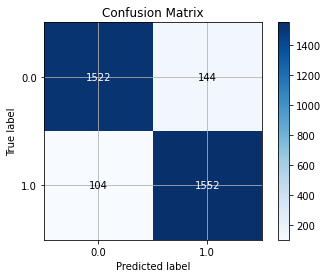

In [17]:
plot_cmat(y_test, y_pred)